In [2]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 83.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 224.5/224.5 kB 25.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.8/7.8 MB 107.8 MB/s eta 0:00:00


In [3]:
from transformers import pipeline

#zero-shot sequence classifiers

Yin et al. proposed a method for using pre-trained NLI models as a ready-made zero-shot sequence classifiers. The method works by posing the sequence to be classified as the NLI premise and to construct a hypothesis from each candidate label.

In [4]:
classifier = pipeline("zero-shot-classification",model="facebook/bart-large-mnli")

#zero-shot classification method:
It is surprisingly effective in many cases, particularly when used with larger pre-trained models like BART and Roberta. 

Here,we are using this model for zero-shot classification with Hugging Face's built-in pipeline

In [5]:
import pandas as pd

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [57]:
df = pd.read_csv('/content/drive/MyDrive/Colab_Notebooks/SECONDYEAR_TRIMESTER4_Module03_deep-learning-applications/ecommerce_reviews.csv')

In [58]:
df.dropna(inplace=True)

In [59]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses


In [60]:
df.shape

(12909, 11)

In [61]:
ecommerce_db = df.sample(frac =.002)

In [62]:
ecommerce_db.shape

(26, 11)

In [63]:
ecommerce_db['Title'].unique()

array(['Excellent', 'Beautiful color and style', 'In love!', 'Gorgeous!!',
       'Wonderful!', 'So cute but not on me',
       'Really hoped this would be my go-to winter dress',
       'Beautiful and bright', 'A beautiful skirt!', 'Winter sweater',
       'Nice tee', 'Pretty, colorful top',
       'Comfortable, attractive, cozy sweater.',
       'Worst peplum top in history',
       'Most stylish sweatshirt i own now.',
       'Bettors off the shoulder top is a must!',
       'Beautiful dress but sleeves were too tight',
       'This is a fantastic summer wear all the time dress',
       'Pretty print!', 'Much better in person', 'Love this blazer!!!!!',
       'Stunning dress', 'So cozy', 'Adorable',
       'Great garden party dress', 'The only fall dress you need'],
      dtype=object)

In [64]:
ecommerce_db.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
11154,16763,993,48,Excellent,"I am 5'3"", 28/38 and got the sp. had no issues...",5,1,2,General,Bottoms,Skirts
12583,18951,863,40,Beautiful color and style,"I'm a big fan of left of center as a brand, an...",5,1,0,General Petite,Tops,Knits
15082,22759,1068,62,In love!,I am in love with this piece! i am long waiste...,5,1,4,General Petite,Bottoms,Pants
11461,17242,850,57,Gorgeous!!,I paired this beauty with the beacheress neckl...,5,1,3,General,Tops,Blouses
804,1243,979,63,Wonderful!,I agree with the previous comments. the vest r...,5,1,1,General,Jackets,Jackets


In [65]:
features = ['Review Text','Title']
ecommerce_db=ecommerce_db[features]

In [66]:
ecommerce_db.head(5)

,Review Text,Title
11154,"I am 5'3"", 28/38 and got the sp. had no issues...",Excellent
12583,"I'm a big fan of left of center as a brand, an...",Beautiful color and style
15082,I am in love with this piece! i am long waiste...,In love!
11461,I paired this beauty with the beacheress neckl...,Gorgeous!!
804,I agree with the previous comments. the vest r...,Wonderful!


In [67]:
sequences=ecommerce_db['Review Text']

In [69]:
Score_list = ecommerce_db['Title'].tolist()
genlist=[]
for k in range(0,26):
  x = Score_list[k].split(",")
  for i in x:
    genlist.append(i)
set_Genre = set(genlist)
genre = (list(set_Genre))

#Applying Zero Shot Text Classification Model on IMDB-Movie-Data Dataset:

we will collect first 100 rows of ecommerce_reviews Dataset and use Zero Shot Text Classification Model on the “Review Text” Field to predict the “Genre” Labels.

In [70]:
print(genre)

['Beautiful color and style', 'Love this blazer!!!!!', 'Most stylish sweatshirt i own now.', ' colorful top', 'Gorgeous!!', 'So cozy', 'A beautiful skirt!', 'Pretty print!', 'Much better in person', 'Worst peplum top in history', 'Really hoped this would be my go-to winter dress', 'Pretty', 'Excellent', 'Bettors off the shoulder top is a must!', 'So cute but not on me', 'Beautiful and bright', 'Wonderful!', 'Adorable', 'Nice tee', 'Comfortable', 'This is a fantastic summer wear all the time dress', 'Great garden party dress', 'The only fall dress you need', 'Beautiful dress but sleeves were too tight', 'Winter sweater', ' cozy sweater.', 'In love!', ' attractive', 'Stunning dress']


In [71]:
sequences[0:5]

11154    I am 5'3", 28/38 and got the sp. had no issues...
12583    I'm a big fan of left of center as a brand, an...
15082    I am in love with this piece! i am long waiste...
11461    I paired this beauty with the beacheress neckl...
804      I agree with the previous comments. the vest r...
Name: Review Text, dtype: object

#predicting the “Genre” Labels

In [72]:
x=[]
j=0
for i in sequences:
  x.append(classifier(i,genre,multi_label=True))
  print(x[j])
  j=j+1
with open("classification_100.txt","w")as file1:
  file1.write(str(x))
file1.close()

{'sequence': 'I am 5\'3", 28/38 and got the sp. had no issues whatsoever, and love the colors.', 'labels': [' attractive', 'Beautiful color and style', 'Excellent', 'Pretty', 'Gorgeous!!', 'Comfortable', 'Beautiful and bright', ' colorful top', 'Wonderful!', 'Pretty print!', 'So cozy', 'In love!', 'Love this blazer!!!!!', 'Adorable', 'Nice tee', 'This is a fantastic summer wear all the time dress', 'Stunning dress', 'Really hoped this would be my go-to winter dress', 'A beautiful skirt!', 'Winter sweater', 'Much better in person', 'Great garden party dress', ' cozy sweater.', 'Most stylish sweatshirt i own now.', 'Bettors off the shoulder top is a must!', 'So cute but not on me', 'Beautiful dress but sleeves were too tight', 'The only fall dress you need', 'Worst peplum top in history'], 'scores': [0.9967361092567444, 0.9921117424964905, 0.9899247884750366, 0.9883710741996765, 0.9875947833061218, 0.981725811958313, 0.9781693816184998, 0.9613657593727112, 0.9522551894187927, 0.871853113

# Evaluating prediction probabilities for the first five sequences:

predicting the “Genre” Labels,we are listing all scores of different labels for first five sequences and comparing with what is available in Genre_list.we get prediction probabilities of quite many labels as higher than 45% and mostly in the range of 70-90% which is quite satisfactory. 

In [76]:
for i in range(0,5):
  print(x[i]['sequence'])
  print("Score_list:",genre)
  loop_len=len(x[i]['labels'])
  for j in range(0,loop_len):
    if(x[i]['scores'][j]<0.20):
      continue
    print(x[i]['labels'][j],'.....',x[i]['scores'][j])

I am 5'3", 28/38 and got the sp. had no issues whatsoever, and love the colors.
Score_list: ['Beautiful color and style', 'Love this blazer!!!!!', 'Most stylish sweatshirt i own now.', ' colorful top', 'Gorgeous!!', 'So cozy', 'A beautiful skirt!', 'Pretty print!', 'Much better in person', 'Worst peplum top in history', 'Really hoped this would be my go-to winter dress', 'Pretty', 'Excellent', 'Bettors off the shoulder top is a must!', 'So cute but not on me', 'Beautiful and bright', 'Wonderful!', 'Adorable', 'Nice tee', 'Comfortable', 'This is a fantastic summer wear all the time dress', 'Great garden party dress', 'The only fall dress you need', 'Beautiful dress but sleeves were too tight', 'Winter sweater', ' cozy sweater.', 'In love!', ' attractive', 'Stunning dress']
 attractive ..... 0.9967361092567444
Beautiful color and style ..... 0.9921117424964905
Excellent ..... 0.9899247884750366
Pretty ..... 0.9883710741996765
Gorgeous!! ..... 0.9875947833061218
Comfortable ..... 0.981725

# **CLASSIFICATION PROBLEM**

In [77]:
df.head(5)

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
1,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
2,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
3,5,1080,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
4,6,858,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits
5,8,1077,24,Flattering,I love this dress. i usually get an xs but it ...,5,1,0,General,Dresses,Dresses


In [78]:
features = ['Review Text','Rating']
df=df[features]

In [79]:
df.head()

,Review Text,Rating
1,"I love, love, love this jumpsuit. it's fun, fl...",5
2,This shirt is very flattering to all due to th...,5
3,"I love tracy reese dresses, but this one is no...",2
4,I aded this in my basket at hte last mintue to...,5
5,I love this dress. i usually get an xs but it ...,5


In [80]:
df['Rating'].unique()

array([5, 2, 1])

In [81]:
df.Rating = df.Rating.replace(2,1)

In [82]:
df['Rating'].unique()

array([5, 1])

In [111]:
df.head()

,Review Text,Rating
1,"I love, love, love this jumpsuit. it's fun, fl...",5
2,This shirt is very flattering to all due to th...,5
3,"I love tracy reese dresses, but this one is no...",1
4,I aded this in my basket at hte last mintue to...,5
5,I love this dress. i usually get an xs but it ...,5


In [113]:
#Build the bow vector
from sklearn.feature_extraction.text import CountVectorizer
bow_vectorizer = CountVectorizer(max_df=0.90, min_df=2, max_features=145, stop_words='english')
x_bow = bow_vectorizer.fit_transform(df["Review Text"])
#print(bow_vectorizer.get_feature_names())
print(x_bow.toarray())

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 1 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [134]:
# splitting data into training and validation set
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x_bow, df['Rating'], random_state=42, test_size=0.3)

In [135]:
xtrain = xtrain.toarray()
xtest = xtest.toarray()

In [139]:
xtrain.shape

(9036, 145)

In [141]:
ytrain.shape

(9036,)

In [136]:
# create model
from keras.models import Sequential
from keras.layers import Dense
from keras.models import model_from_json
model2=Sequential()
model2.add(Dense(50,input_dim=145,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(8,activation='relu'))
model2.add(Dense(1,activation='sigmoid'))

In [137]:
#Compile model
model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

In [142]:
x_val = xtrain[:3000]
partial_x_train = xtrain[3000:]
y_val = ytrain[:3000]
partial_y_train = ytrain[3000:]

In [153]:
history = model2.fit(partial_x_train,
                    partial_y_train,
                    epochs=20,
                    batch_size=8,
                    validation_data=(x_val, y_val))

Epoch 1/20
755/755 [==============================] - 7s 9ms/step - loss: -902180032.0000 - accuracy: 0.1556 - val_loss: -1003545856.0000 - val_accuracy: 0.1590
Epoch 2/20
755/755 [==============================] - 4s 5ms/step - loss: -1146567936.0000 - accuracy: 0.1556 - val_loss: -1263753088.0000 - val_accuracy: 0.1590
Epoch 3/20
755/755 [==============================] - 3s 4ms/step - loss: -1432484096.0000 - accuracy: 0.1556 - val_loss: -1568226816.0000 - val_accuracy: 0.1590
Epoch 4/20
755/755 [==============================] - 3s 4ms/step - loss: -1763473792.0000 - accuracy: 0.1556 - val_loss: -1917785728.0000 - val_accuracy: 0.1590
Epoch 5/20
755/755 [==============================] - 5s 6ms/step - loss: -2144145152.0000 - accuracy: 0.1556 - val_loss: -2319876864.0000 - val_accuracy: 0.1590
Epoch 6/20
755/755 [==============================] - 4s 6ms/step - loss: -2580573952.0000 - accuracy: 0.1556 - val_loss: -2778363904.0000 - val_accuracy: 0.1590
Epoch 7/20
755/755 [=========

# **Plotting the training and validation accuracy**

In [154]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)

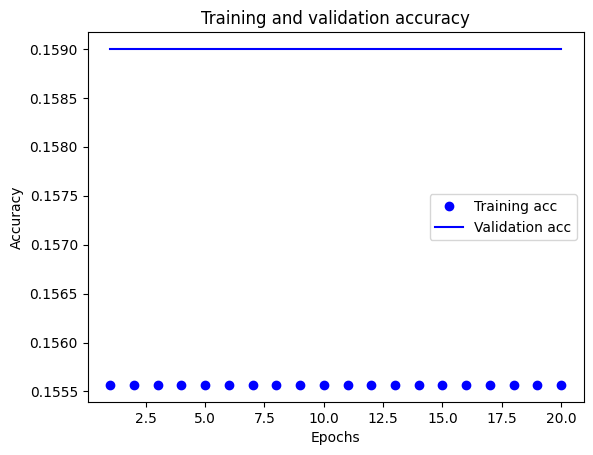

In [155]:
plt.clf()
acc = history_dict["accuracy"]
val_acc = history_dict["val_accuracy"]
plt.plot(epochs, acc, "bo", label="Training acc")
plt.plot(epochs, val_acc, "b", label="Validation acc")
plt.title("Training and validation accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

In [ ]:
!jupyter nbconvert --to html FB_bart-large-mnli_zero-shot_ecommerce_reviews.ipynb